# Packages

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats

# Export Data and Data Analysis

In [2]:
usdxidr = yf.download('usdidr=x', start = '2020-12-31', end = '2023-12-31')
usdxidr['log_return'] = np.log(usdxidr.Close).diff()
sgdxidr = yf.download('sgdidr=x', start = '2020-12-31', end = '2023-12-31')
sgdxidr['log_return'] = np.log(sgdxidr.Close).diff()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
usdxidr['log_return'].quantile(0.75)

0.0027171089973681006

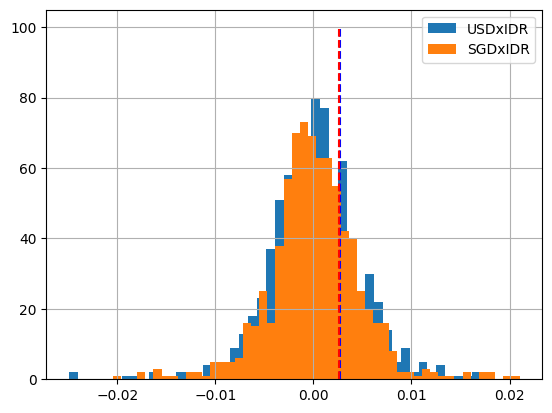

In [4]:
usdxidr['log_return'].hist(bins = 50)
sgdxidr['log_return'].hist(bins = 50)
plt.legend(['USDxIDR', 'SGDxIDR'])
plt.vlines(x = usdxidr['log_return'].quantile(0.75), ymin = 0, ymax = 100, color = 'blue', linestyles='dashed')
plt.vlines(x = sgdxidr['log_return'].quantile(0.75), ymin = 0, ymax = 100, color = 'red', linestyles='dashed')
plt.grid(True)
plt.show()


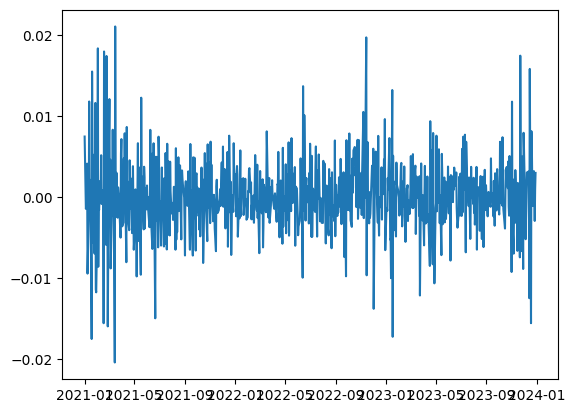

In [5]:
plt.plot(sgdxidr['log_return'])

## Check if Log Return is Normal Distributed using KS Test

Null Hypothesis : Identically Distributed

In [6]:
print('Pval', scipy.stats.kstest(usdxidr['log_return'].dropna(), 'norm', alternative='two-sided').pvalue)
print('USDxIDR Log Return is not from Normal Distribution')

Pval 6.570829638827674e-175
USDxIDR Log Return is not from Normal Distribution


In [7]:
print('Pval',scipy.stats.kstest(sgdxidr['log_return'].dropna(), 'norm', alternative='two-sided').pvalue)
print('SGDxIDR Log Return is not from Normal Distribution')

Pval 7.943948845524429e-175
SGDxIDR Log Return is not from Normal Distribution
